<a href="https://colab.research.google.com/github/umar-ali-k/Text-Generation-with-an-RNN/blob/master/Text_generation_with_an_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install tensorflow 2.0

In [0]:
!pip install tensorflow==2.0.0-beta0

## Import necessary packages

In [0]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

## Set the Data

In [4]:
tokenizer = Tokenizer()

data="""In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n 
Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \n
Who didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \n
Of the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \n
For all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \n
Were dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \n
She tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \n
Just in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \n
Potatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \n
Courting the girls and dancing away. \nSongs they went round as plenty as water, \n
The harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\n
All singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \n
All round the room in a whirligig. \nJulia and I, we banished their nonsense \n
And tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \n
Danced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \n
Learning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \n
Three long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \n
Learning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \n
I stepped out and she stepped in again, \nShe stepped out and I stepped in again, \n
Learning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \
 danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \n
 Put his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \n
 Called for her brothers and gathered them all. \nCarmody swore that hed go no further \n
 Til he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \n
 Her cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \n
 
 She took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \n
 When he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \n
 And smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \n
 Myself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \n
 Old Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \n
 The girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."""

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

## Pad the Sequences. Create predictors and label

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## Map the words with the integer tokens

In [6]:
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

2
66
8
67
68
69
70


# Sequential Model having Bidirectional LSTM

In [8]:
  model = Sequential()
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(total_words, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 453 samples
Epoch 1/500
453/453 [==============================] - 1s 3ms/sample - loss: 5.5697 - accuracy: 0.0088
Epoch 2/500
453/453 [==============================] - 0s 627us/sample - loss: 5.5495 - accuracy: 0.0618
Epoch 3/500
453/453 [==============================] - 0s 630us/sample - loss: 5.5059 - accuracy: 0.0486
Epoch 4/500
453/453 [==============================] - 0s 625us/sample - loss: 5.3599 - accuracy: 0.0486
Epoch 5/500
453/453 [==============================] - 0s 654us/sample - loss: 5.1613 - accuracy: 0.0486
Epoch 6/500
453/453 [==============================] - 0s 674us/sample - loss: 5.0811 - accuracy: 0.0486
Epoch 7/500
453/453 [==============================] - 0s 651us/sample - loss: 5.0474 - accuracy: 0.0442
Epoch 8/500
453/453 [==============================] - 0s 605us/sample - loss: 5.0215 - accuracy: 0.0662
Epoch 9/500
453/453 [==========================

## Plot the accuracy of the model

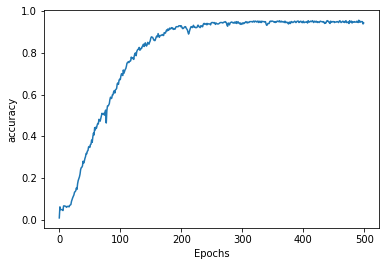

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')  

## Generate New Text

In [12]:
next_words = 100
seed_text = "Tom Cruise went to dublin"

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Tom Cruise went to dublin girls and the table little milliner forget call forget call call round a call call hoops hoops hoops didnt painted call forget didnt painted forget call died for her and daughter call harp once polkas forget didnt painted forget call lads call call suppose up a call forget cask call too suppose suppose suppose academy long weeks at suppose suppose brooks hoops forget call too suppose suppose suppose academy academy academy long weeks at brooks academy academy academy academy academy long weeks at brooks academy academy academy academy academy academy weeks at brooks academy academy academy academy academy academy long
